<a href="https://colab.research.google.com/github/pjcroxas/Data-Analytics-Case-Studies/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Marketing A/B testing dataset**
Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

The companies are interested in answering two questions:

1. Would the campaign be successful?
2. If the campaign was successful, how much of that success could be attributed to the ads?
3. With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to `ads` (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement `(PSA)`(or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

Data dictionary:

- Index: Row index
- user id: User ID (unique)
- test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement.
- converted: If a person bought the product then True, else is False
- total ads: Amount of ads seen by person
- most ads day: Day that the person saw the biggest amount of ads
- most ads hour: Hour of day that the person saw the biggest amount of ads

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [9]:
os.path.isdir("/content/drive/My Drive")

True

In [13]:
dirs = "/content/drive/My Drive/Data Science Portfolio/Analytics Case-Studies/Datasets"
mkt_df = pd.read_csv(dirs+"/marketing_AB.csv")
mkt_df.drop("Unnamed: 0", axis=1, inplace=True)
mkt_df.sample(3)

,user id,test group,converted,total ads,most ads day,most ads hour
471469,1328000,ad,False,6,Friday,19
370417,1471352,ad,False,21,Monday,20
294400,1208323,ad,False,9,Friday,12


In [18]:
mkt_df["user id"].nunique()

588101

Text(0.5, 0, 'Test Count')

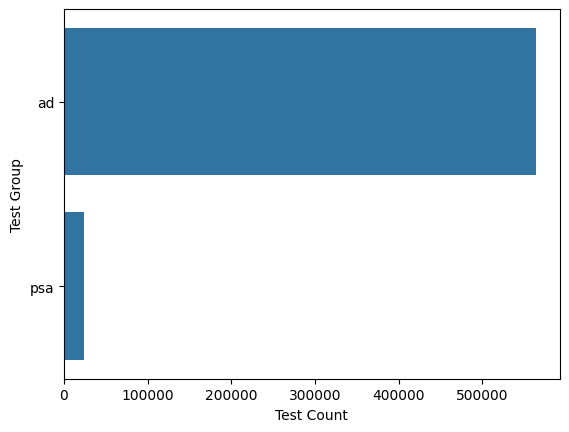

In [20]:
sns.countplot(mkt_df["test group"])
plt.ylabel("Test Group")
plt.xlabel("Test Count")

**1. Let's see which customer bought the product based from what type od ad they receive.**

In [43]:
mkt_conv = mkt_df.groupby(["test group", "converted"]).agg({"user id": "count"})
mkt_pct = mkt_conv.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
mkt_pct

<ipython-input-43-5518b763c031>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mkt_pct = mkt_conv.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


user id
test group test group converted           
ad         ad         False      97.445344
                      True        2.554656
psa        psa        False      98.214589
                      True        1.785411

1. 2.6% of the people exposed to `ads` bought the product.
2. 1.78% of the people exposed to `psa` bought the product.
3. People exposed to psa has higher rate of not buying than people exposed to the ads. Howvever, there is only 0.77% difference between the two. The percentage of not buying and buying are both significantly high.

[Text(0, 0, 'Ads'), Text(1, 0, 'PSA')]

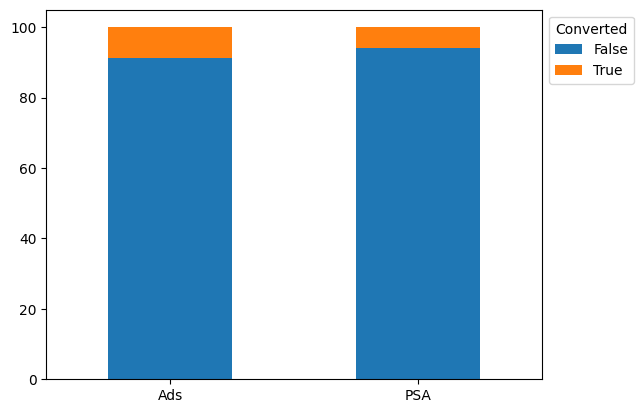

In [75]:
mkt_total_ads = mkt_df.groupby(["test group", "converted"]).agg({'total ads': 'sum'})
mkt_ads_sum = mkt_df.groupby(["test group"]).agg({'total ads': 'sum'})
mkt_pct = mkt_total_ads.div(mkt_ads_sum, level='test group') * 100
mkt_pct.reset_index(inplace=True)
mkt_pct = mkt_pct.pivot(index="test group",
                    columns="converted",
                    values="total ads").reset_index()

ax = mkt_pct.plot(kind="bar", stacked=True)
plt.legend(title="Converted", bbox_to_anchor=(1, 1))
ax.set_xticklabels(["Ads", "PSA"], rotation=0)

<Figure size 1500x500 with 0 Axes>

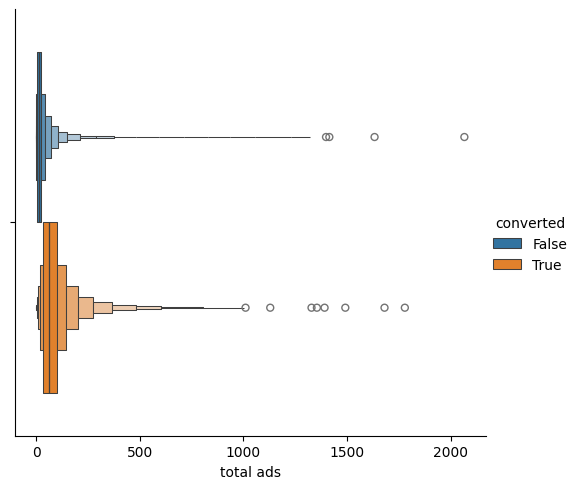

In [73]:
sns.catplot(mkt_df,
            x="total ads",
            hue="converted",
            kind="boxen")

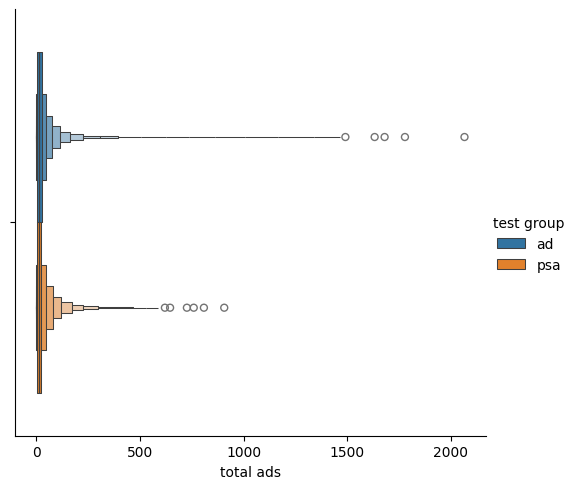

In [84]:
sns.catplot(mkt_df,
            x="total ads",
            hue="test group",
            kind="boxen")

1. ads received by both groups are positively skewed. This means that the cost incur is lower.
2. Both group experience low conversion rate. Even for extreme number of ad exposure, customer engagement is low.

In [77]:
mkt_df["total ads"].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

In [97]:
def ad_exposure_class(num_ads):
  if num_ads <= 9:
    return "Less than 9 ads"
  elif (num_ads>=10) and (num_ads<=50):
    return "10-50 ads"
  elif (num_ads>=51) and (num_ads<=99):
    return "51-99 ads"
  elif num_ads >= 100:
    return "Greater than 100"
  else:
    pass

mkt_df["ad exposure class"] = mkt_df["total ads"].apply(ad_exposure_class)

In [80]:
mkt_df.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour', 'ad exposure class'],
      dtype='object')

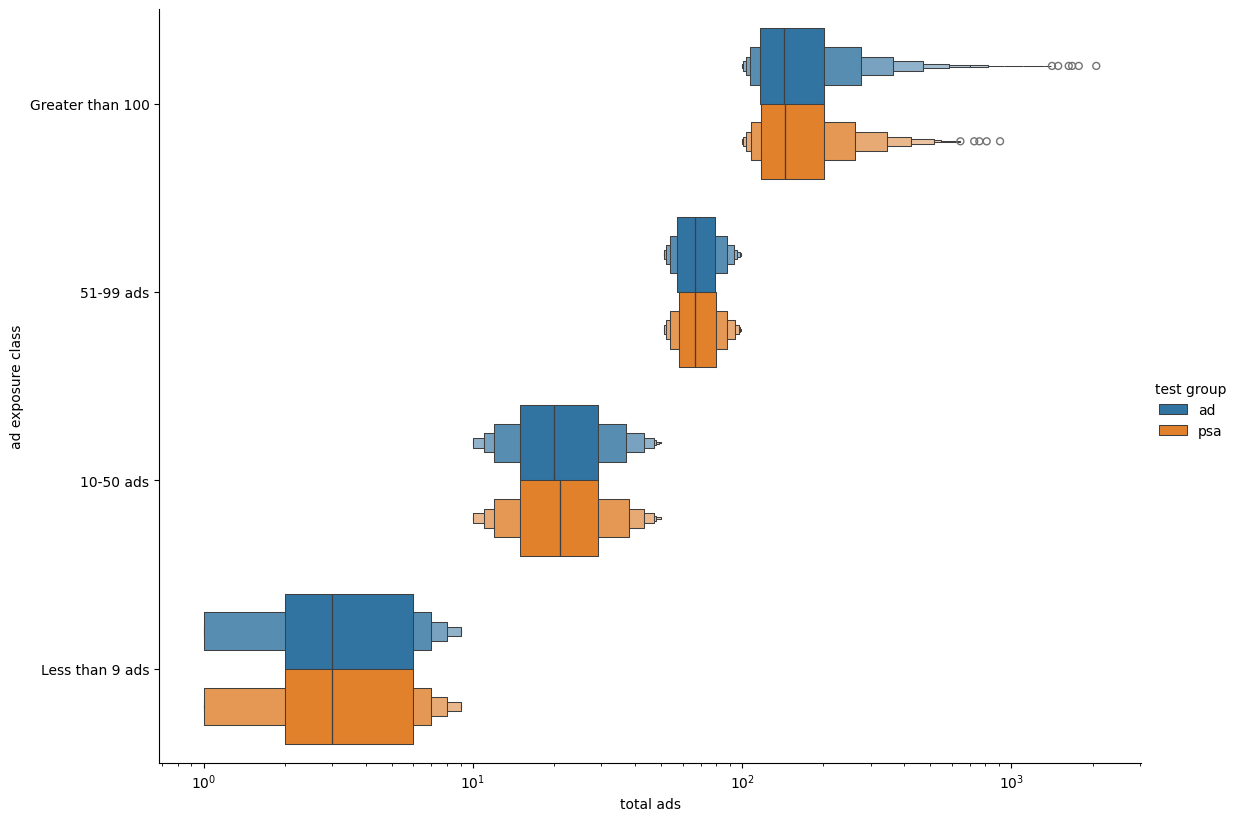

In [103]:
sns.catplot(mkt_df,
            x="total ads",
            y="ad exposure class",
            hue="test group",
            kind="boxen",
            height=8.27, aspect=11.7/8.27)

plt.xscale('log')
plt.ylabel("Ad Exposure Level", fontsize=15)
plt.ylabel("Total Ads", fontsize=15)

Text(0.5, 28.999999999999986, 'Total Ads')

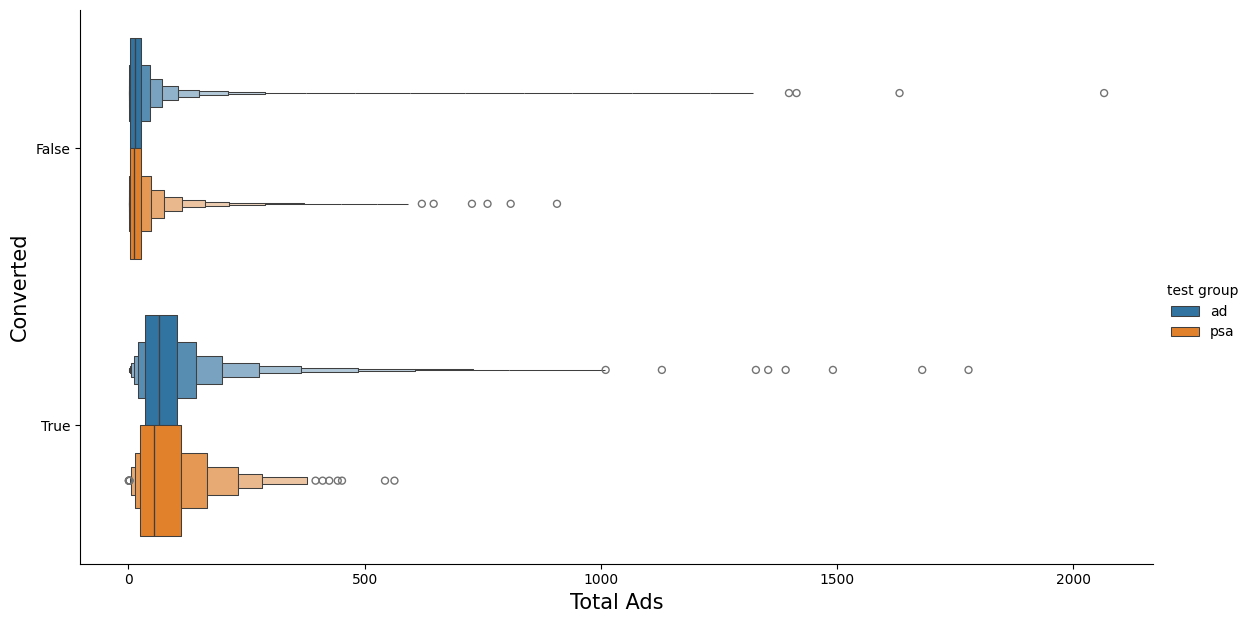

In [114]:
mkt_df_sub = mkt_df.copy()
mkt_df_sub["converted"] = mkt_df_sub["converted"].astype(str)
ax = sns.catplot(mkt_df_sub,
            x="total ads",
            y="converted",
            hue="test group",
            kind="boxen",
            height=6.27, aspect=11.7/6.27)

# plt.xscale('log')
plt.ylabel("Converted", fontsize=15)
plt.xlabel("Total Ads", fontsize=15)

1. Longer exposure to ads does not always result in buying the product.
2. Exposure to `psa` can suffice or compete against `ads` exposure when it comes in buying the product.
3. non-convertion ratio is significantly larger convertion ratio.

In [116]:
print(mkt_df.columns)
print(mkt_df.info())

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour', 'ad exposure class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user id            588101 non-null  int64 
 1   test group         588101 non-null  object
 2   converted          588101 non-null  bool  
 3   total ads          588101 non-null  int64 
 4   most ads day       588101 non-null  object
 5   most ads hour      588101 non-null  int64 
 6   ad exposure class  588101 non-null  object
dtypes: bool(1), int64(3), object(3)
memory usage: 27.5+ MB
None


<ipython-input-124-1a67e57d234a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.pointplot(mkt_time,


Text(0.5, 0, 'Days')

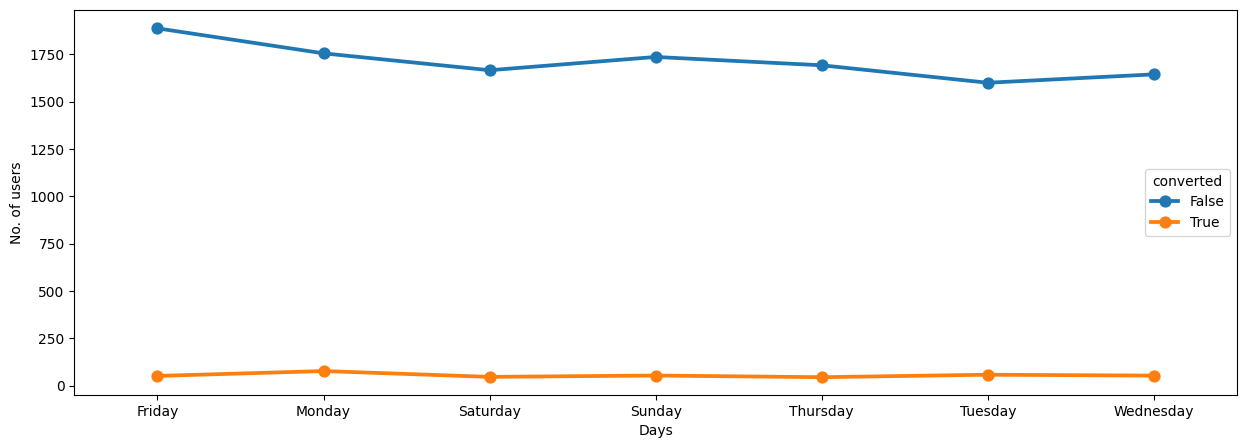

In [124]:
mkt_time = mkt_df.groupby(["most ads day", "most ads hour", "converted", "test group"]).count()["user id"].reset_index()
plt.figure(figsize=(15, 5))
ax = sns.pointplot(mkt_time,
                   x="most ads day",
                   y="user id",
                   hue="converted",
                   ci=False)

plt.ylabel("No. of users")
plt.xlabel("Days")

<ipython-input-125-1502536c853e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.pointplot(mkt_time,


Text(0.5, 0, 'Hour')

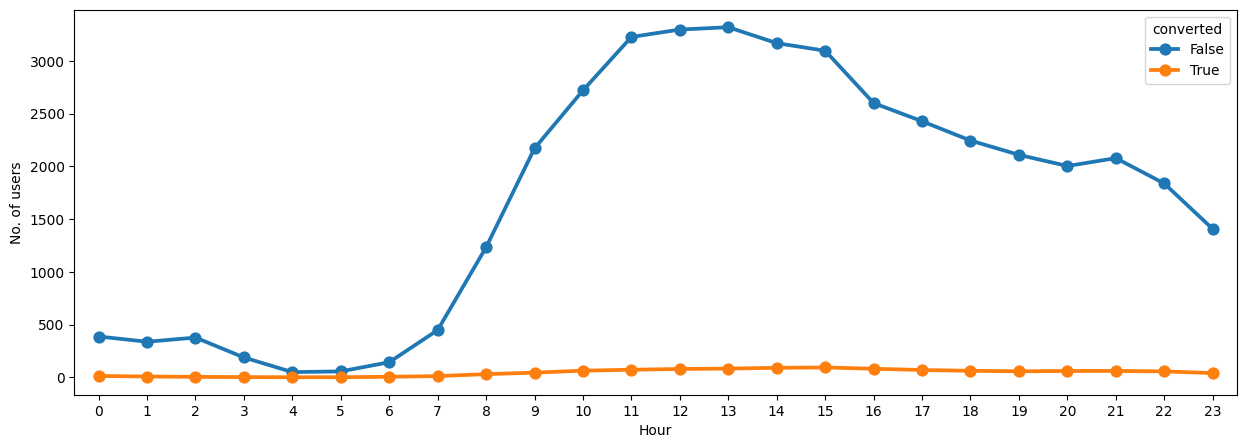

In [125]:
plt.figure(figsize=(15, 5))
ax = sns.pointplot(mkt_time,
                   x="most ads hour",
                   y="user id",
                   hue="converted",
                   ci=False)

plt.ylabel("No. of users")
plt.xlabel("Hour")

<ipython-input-126-4d3a95a704f9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.pointplot(mkt_time,


Text(0.5, 0, 'Hour')

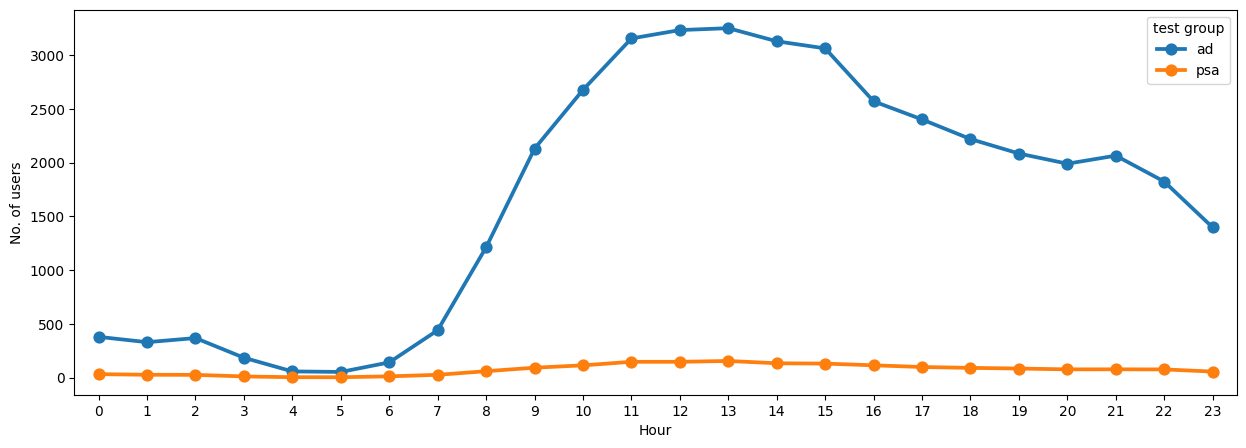

In [126]:
plt.figure(figsize=(15, 5))
ax = sns.pointplot(mkt_time,
                   x="most ads hour",
                   y="user id",
                   hue="test group",
                   ci=False)

plt.ylabel("No. of users")
plt.xlabel("Hour")

1. User exposure for converted and non-converted meet at 4am and 5am.
2. No. of users that opted not to buy a product increases from 7am and peaks at 1pm.
3. all througout the day, user exposures opted not to buy a product. At 11 am, the conversion rate of not buying is still at 3000 users.
4. all throughout the week, user conversion is still low.
5. exposure to ad has higher rate of not buying a product.
---

# **Insights**
1. Exposure to advertisement has higher rate of not buying a product compare to exposure to public service announcements. This may be cause of:
  - Advertisements that are not really striking to the viewer.
  - Misclassification of target buyers,
  - Incorrect time of advertisement

2. Long exposure to ad or psa does not equate to buying the product.
3. Public Service Announcement is more effective compare to ads despite its lower ratio in the dataset.


# **Recommendations**
1. Revised the advertisement, and make it more suitable for the target viewer.
2. Balance the exposure ratio between the time in a day.
3. Improving the psa may improve the conversion rate.